In this notebook, we will visualize the learned HMM model. We will use the code from Set 6, to help us. 

In [5]:
import os
import numpy as np
from IPython.display import HTML
from HMM_helper import (
    text_to_wordcloud,
    states_to_wordclouds,
    parse_observations,
    sample_sentence,
    visualize_sparsities,
    animate_emission,
    most_freq
)

import data_preprocess as data
from HMM import unsupervised_HMM
from HMM_sonnet_helper import sample_sonnet
#from collections import Counter
#from string import punctuation
#import nltk
#nltk.download('stopwords')
import matplotlib.pyplot as plt
%matplotlib inline

Let's run a sample HMM.

In [2]:
obs, obs_map = data.get_shakes_lines()
hmm = unsupervised_HMM(obs, 5, 5)
sample_sonnet(hmm, obs_map)

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:07<00:00,  1.37it/s]


Seem no thou prizing my old are age then
Chance thy of what as you not interest woods
The thought but show be whose i defects is
Thine of sense the ransom tell count with the
It two of make hast hope needst trial the
Alack keep like part others ground their moods
Were evident affords lies give say shalt
Way thou the before my her strange and in
Been seem know that you beauty part do thou
Question the glass thrive lovekindling writ do
Let with you his pleasure upon that of
No what against beauty should private or
Bloody this graces my decay like bring
Therefore coming the and did youth is and



First, we visualize each state as a wordcloud by sampling a large emission from the state:

Now, we'll give a list of the top 10 words that associate with each hidden state.

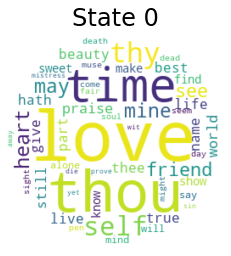

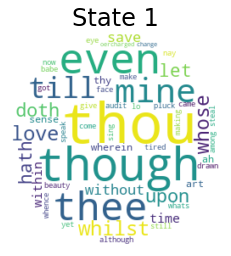

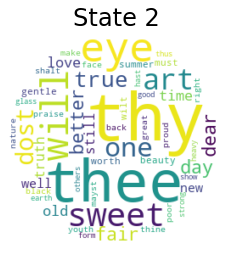

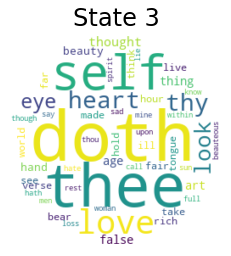

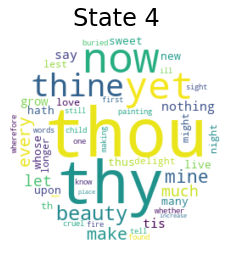

The top 10 words for state 0 are:
to: 1443
love: 758
the: 565
of: 505
thou: 495
me: 458
and: 345
her: 299
is: 298
time: 292



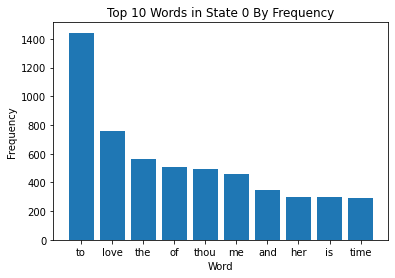

The top 10 words for state 1 are:
and: 670
for: 390
but: 364
to: 250
which: 228
when: 210
as: 198
no: 198
if: 193
o: 155



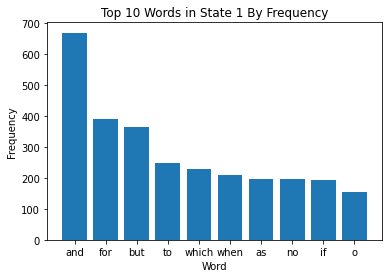

The top 10 words for state 2 are:
my: 1911
i: 1320
the: 1227
that: 653
thy: 640
it: 547
his: 547
to: 533
in: 512
thee: 483



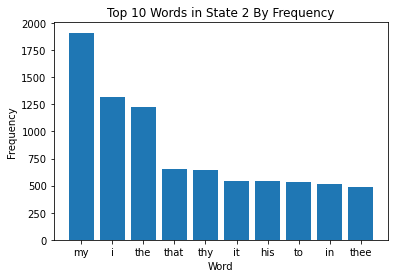

The top 10 words for state 3 are:
of: 998
and: 958
be: 418
doth: 402
not: 402
is: 350
thee: 349
for: 347
by: 328
shall: 316



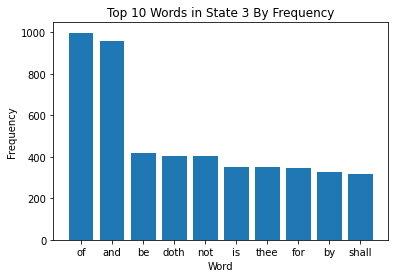

The top 10 words for state 4 are:
in: 948
that: 905
the: 697
thou: 645
thy: 485
i: 485
and: 476
with: 461
on: 436
all: 429



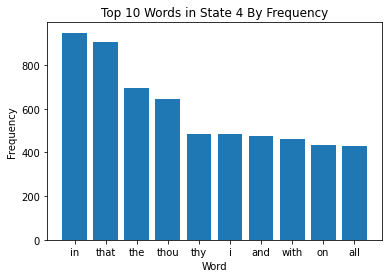

In [3]:
most_freq(hmm, obs_map)

Now, let's animate the emissions.


Animating...


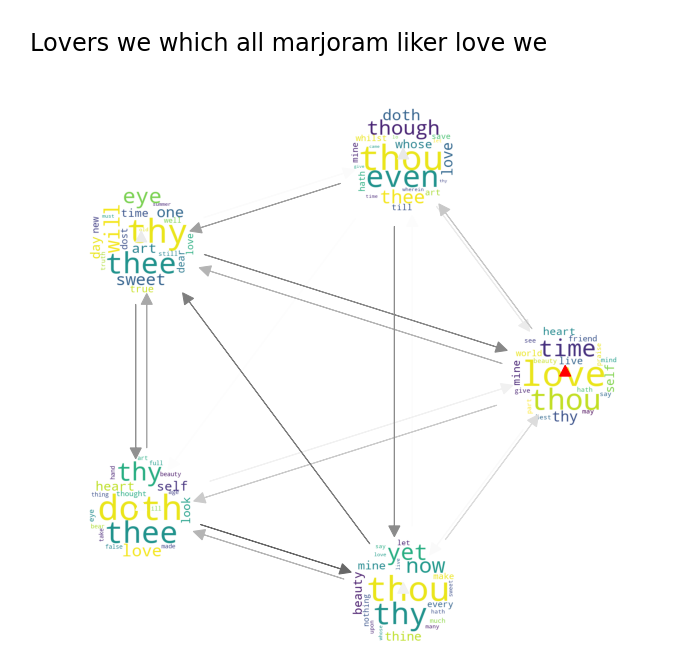

In [6]:
anim = animate_emission(hmm, obs_map, M=8)
HTML(anim.to_html5_video())